<a href="https://colab.research.google.com/github/ThomasGVoss/LearningFactory/blob/main/Lab_Data_Prep_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Basic Introduction

The **CR**oss **I**ndustry **S**tandard **P**rocess for **D**ata **M**ining (CRISP-DM) is a process model that serves as the base for a data science process. It has six sequential phases:



1.   Business understanding – What does the business need?
2.   Data understanding – What data do we have / need? Is it clean?
3.   Data preparation – How do we organize the data for modeling?
4.   Modeling – What modeling techniques should we apply?
5.   Evaluation – Which model best meets the business objectives?
6.   Deployment – How do stakeholders access the results?


Published in 1999 to standardize data mining processes across industries, it has since become the most common methodology for data mining, analytics, and data science projects.

In this notebook we will take a look at the first three steps

## Phase 1: Business Understanding

The Business Understanding phase focuses on understanding the objectives and requirements of the project. Aside from the third task, the three other tasks in this phase are foundational project management activities that are universal to most projects:

**Determine business objectives:** You should first “thoroughly understand, from a business perspective, what the customer really wants to accomplish.” (CRISP-DM Guide) and then define business success criteria.

**Assess situation:** Determine resources availability, project requirements, assess risks and contingencies, and conduct a cost-benefit analysis.

**Determine data mining goals:** In addition to defining the business objectives, you should also define what success looks like from a technical data mining perspective.

**Produce project plan:** Select technologies and tools and define detailed plans for each project phase.

While many teams hurry through this phase, establishing a strong business understanding is like building the foundation of a house – absolutely essential.

This enables close coordination between technical department of Data Scientists, Data Analysts and Data Engineers with business stakeholders.

### Objective in this notebook
For now, let us assume we are in the learning factory and we know, that some products take longer than others.

We want to find out why this is the case. If possible, we want to derive actions to ensure, that all products are delivered on time!

## Phase 2: Data Understanding


Next is the Data Understanding phase. Adding to the foundation of Business Understanding, it drives the focus to identify, collect, and analyze the data sets that can help you accomplish the project goals. This phase also has four tasks:

Collect initial data: Acquire the necessary data and (if necessary) load it into your analysis tool.
Describe data: Examine the data and document its surface properties like data format, number of records, or field identities.
Explore data: Dig deeper into the data. Query it, visualize it, and identify relationships among the data.
Verify data quality: How clean/dirty is the data? Document any quality issues.

In [1]:
import numpy as np                                # For matrix operations and numerical processing
import pandas as pd                               # For munging tabular data
import matplotlib.pyplot as plt                   # For charts and visualizations
from IPython.display import Image                 # For displaying images in the notebook
from IPython.display import display               # For displaying outputs in the notebook
from time import gmtime, strftime                 # For labeling SageMaker models, endpoints, etc.
import sys                                        # For writing outputs to notebook
import math                                       # For ceiling function
import json                                       # For parsing hosting outputs
import os                                         # For manipulating filepath names
import zipfile
import seaborn as sns                               # For unzipping

# ensure graphs are displayed correctly inline in this notebook
%matplotlib inline

Collecting and Loading the data

In [2]:
!wget https://raw.githubusercontent.com/ThomasGVoss/LearningFactory/main/apjournal.csv
!wget https://raw.githubusercontent.com/ThomasGVoss/LearningFactory/main/kundenauftrag.csv
!wget https://raw.githubusercontent.com/ThomasGVoss/LearningFactory/main/produktionsauftrag.csv


--2023-10-04 09:10:40--  https://raw.githubusercontent.com/ThomasGVoss/LearningFactory/main/apjournal.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 297142 (290K) [text/plain]
Saving to: ‘apjournal.csv’

apjournal.csv       100%[===================>] 290.18K  --.-KB/s    in 0.02s   

2023-10-04 09:10:40 (12.2 MB/s) - ‘apjournal.csv’ saved [297142/297142]

--2023-10-04 09:10:40--  https://raw.githubusercontent.com/ThomasGVoss/LearningFactory/main/kundenauftrag.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 277956 (271K) [

In [3]:
col = ['ProcessId','RoundId','Workstation','Null','Start','End']
raw = pd.read_csv('/content/apjournal.csv', header=None, names=col, index_col=0 , sep=',',on_bad_lines='skip')
pd.set_option('display.max_columns', 500)   # Make sure we can see all of the columns
pd.set_option('display.max_rows', 20) # Keep the output on one page
raw = raw.drop(columns='Null')


Let's start exploring the data. First, let's understand how the data looks and how it is distributed.

In [4]:
raw.sample(5)

,ProcessId,RoundId,Workstation,Start,End
604,355,74,1,2018-08-07 12:18:13,2018-08-07 12:33:18
3026,1381,186,3,2021-03-05 13:04:38,2021-03-05 13:08:47
1583,711,91,1,2019-05-24 17:13:33,2019-05-24 17:14:37
4100,1735,214,5,2022-08-26 14:11:01,2022-08-26 14:11:47
3056,1381,186,5,2021-03-05 13:15:26,2021-03-05 13:16:03


In [5]:
raw = raw[raw['RoundId'] == 216 ]

In [6]:
# Two ways to format the Start and Ende Colums to the datetime object
raw['Start'] = pd.to_datetime(raw['Start'])
#data['End'] = pd.to_datetime(data['End'])
raw['End'] = raw['End'].astype('datetime64[ns]')

In [8]:
# The Process ID as well as the Workstation are discrete categorical variables
raw['ProcessId'] = raw['ProcessId'].astype("int")
raw['Workstation'] = raw['Workstation'].astype("category")
raw['RoundId'] = raw['RoundId'].astype("category")

In [9]:
raw.dtypes

ProcessId               int64
RoundId              category
Workstation          category
Start          datetime64[ns]
End            datetime64[ns]
dtype: object

Let's take a look into the round we played during the course and talk about it



In [11]:
raw['ProcessId']

4125    1745
4126    1745
4127    1746
4128    1747
4129    1745
        ... 
4217    1762
4218    1759
4219    1762
4220    1762
4221    1762
Name: ProcessId, Length: 97, dtype: int64

Text(0, 0.5, 'Process Id')

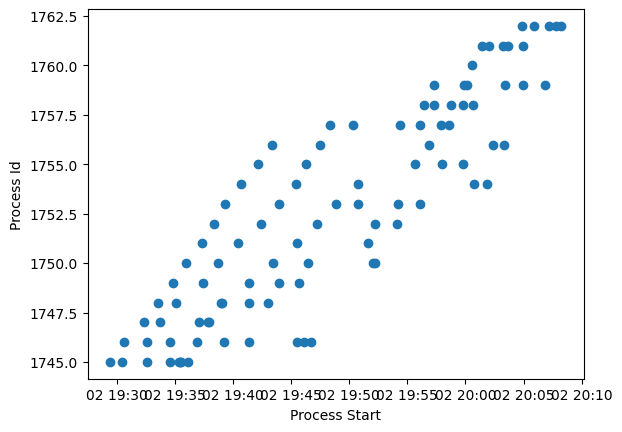

In [14]:
plt.scatter(raw['Start'],raw['ProcessId'])
plt.xlabel('Process Start')
plt.ylabel('Process Id')

In [15]:
# group all entries by the ProcessID and see if this matches the production process
print(raw.groupby(['ProcessId']).size())

ProcessId
1745    8
1746    9
1747    5
1748    6
1749    5
1750    6
1751    4
1752    5
1753    6
1754    5
1755    5
1756    5
1757    6
1758    5
1759    6
1760    1
1761    5
1762    5
dtype: int64


In [16]:
# Grouping to find out how many samples we have for each station
raw.groupby('Workstation').size()

Workstation
1    18
2    17
3    18
4    25
5    19
dtype: int64

Text(0, 0.5, 'Workstation')

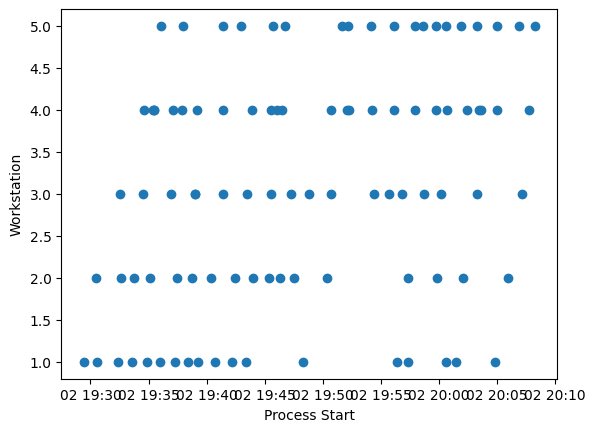

In [17]:
plt.scatter(raw['Start'],raw['Workstation'])
plt.xlabel('Process Start')
plt.ylabel('Workstation')

Given that we did essemble no more than 15 cars with 5 stations each, the numbers seem to have some errors. Especially it might help to investigate the process 1745,1746, as well as 1760.

In [19]:
sample_data = raw.loc[raw['ProcessId'] == 1745]
#sample_data = raw.loc[raw['ProcessId'] == 1746]
print(sample_data)

      ProcessId RoundId Workstation               Start                 End
4125       1745     216           1 2022-09-02 19:29:26 2022-09-02 19:30:27
4126       1745     216           2 2022-09-02 19:30:29 2022-09-02 19:32:32
4129       1745     216           3 2022-09-02 19:32:35 2022-09-02 19:34:29
4134       1745     216           4 2022-09-02 19:34:35 2022-09-02 19:36:03
4137       1745     216           4 2022-09-02 19:35:23 2022-09-02 19:36:03
4138       1745     216           4 2022-09-02 19:35:26 2022-09-02 19:36:03
4139       1745     216           4 2022-09-02 19:35:30 2022-09-02 19:36:03
4141       1745     216           5 2022-09-02 19:36:06 2022-09-02 19:36:17


Text(0, 0.5, 'Workstation')

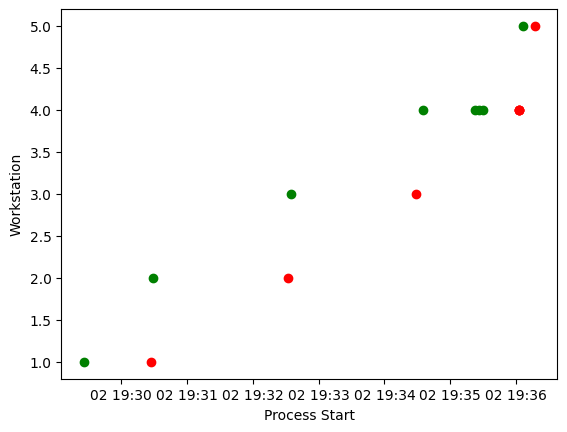

In [20]:
plt.scatter(sample_data['Start'],sample_data['Workstation'], color = 'g')
plt.scatter(sample_data['End'],sample_data['Workstation'], color = 'r')
plt.xlabel('Process Start')
plt.ylabel('Workstation')

In [22]:
raw.loc[raw['ProcessId'] == 1760]

,ProcessId,RoundId,Workstation,Start,End
4203,1760,216,1,2022-09-02 20:00:36,NaT


 Since we still have the index, we could drop values with error, in case we need to. Possible options are 4137, 4138, 4139, 4142, 4152, 4157, 4170 and 4173



In [23]:
data_proc = raw
#data_proc = data.drop(index=[4137,4138,4139,4142,4152,4157,4170])

In [24]:
#Generate the duration based on the end and the start date
data_proc['Duration'] = data_proc['End'] - data_proc['Start']

# Series.dt - Accessor object for datetimelike properties of the Series values.
data_proc['ProcessDurationInSeconds'] = data_proc['Duration'].dt.total_seconds()

#drop the duration col
data_proc = data_proc.drop(columns=['Duration'])

In [25]:
# Get the most basic information about the dataset
data_proc.describe()

,ProcessId,ProcessDurationInSeconds
count,97.000000,96.000000
mean,1752.680412,75.302083
std,5.312223,73.804738
min,1745.000000,1.000000
25%,1748.000000,30.500000
50%,1753.000000,62.000000
75%,1757.000000,94.000000
max,1762.000000,414.000000


Text(0, 0.5, 'Process Duration [sec]')

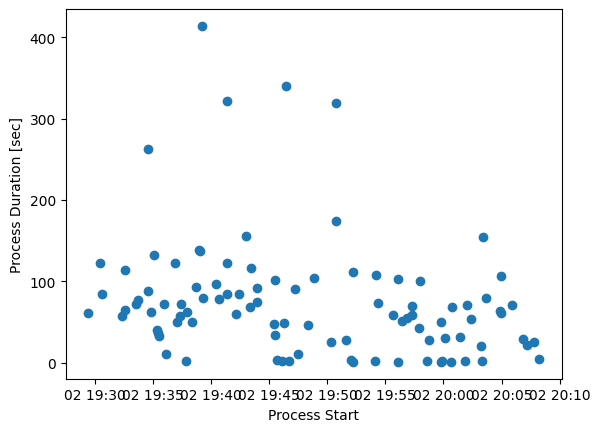

In [26]:
plt.scatter(data_proc['Start'],data_proc['ProcessDurationInSeconds'])
plt.xlabel('Process Start')
plt.ylabel('Process Duration [sec]')

Text(0.5, 0, 'Process Duration [sec]')

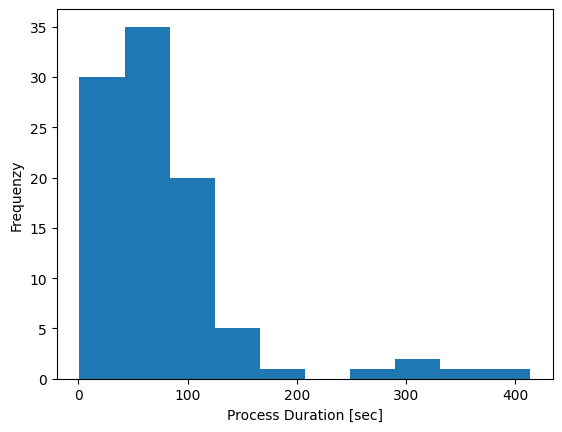

In [27]:
plt.hist(data_proc['ProcessDurationInSeconds'])
plt.ylabel('Frequenzy')
plt.xlabel('Process Duration [sec]')

Text(0.5, 0, 'Group')

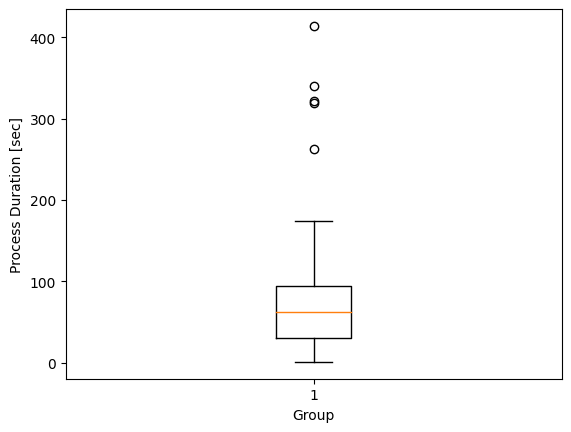

In [28]:
plt.boxplot([data_proc['ProcessDurationInSeconds'].dropna().astype('int')])
plt.ylabel('Process Duration [sec]')
plt.xlabel('Group')

Let us split that by workstation to get some deeper understanding

In [29]:
# let's find the mean value of each process step
data_proc.groupby(['Workstation']).mean()

<ipython-input-29-4342e2261e7b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_proc.groupby(['Workstation']).mean()


,ProcessId,ProcessDurationInSeconds
Workstation,,
1,1753.500000,62.764706
2,1753.117647,67.823529
3,1752.777778,98.611111
4,1751.520000,98.160000
5,1752.947368,41.052632


<Axes: xlabel='Workstation', ylabel='ProcessDurationInSeconds'>

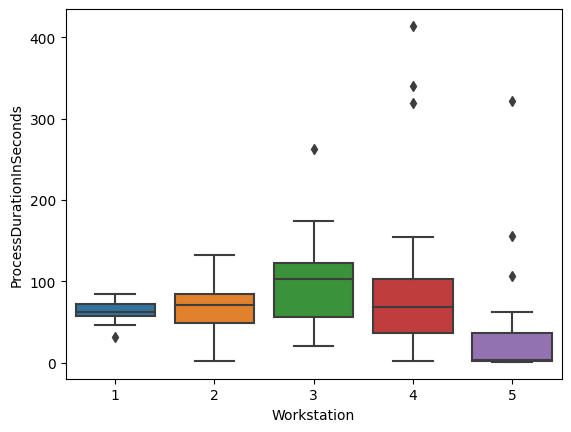

In [30]:
# Plot the mean value of the processing time based on work station
sns.boxplot(x='Workstation', y='ProcessDurationInSeconds', data=data_proc)

Text(0, 0.5, 'Sum of Processtimes [Sec]')

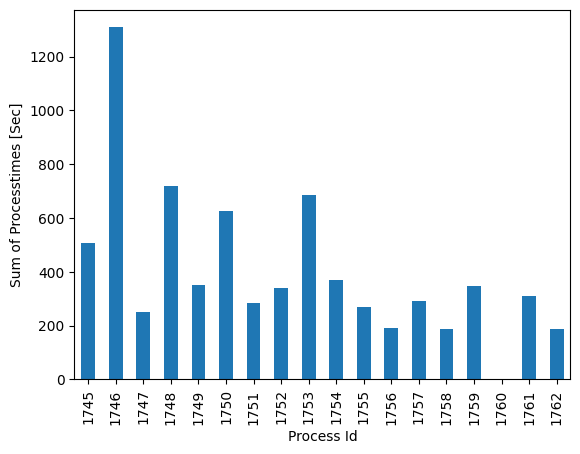

In [32]:
# Plot the sum of the processtimes based on the Process IDs
id_plot = data_proc.groupby(['ProcessId'])['ProcessDurationInSeconds'].sum().plot.bar()
id_plot.set_xlabel("Process Id")
id_plot.set_ylabel("Sum of Processtimes [Sec]")

It seems, that some processes take in sum longer than others. We need additional data to find out what makes those processes special.

## Phase 3: Data Preparation and Transformation / Feature engineering

---


Cleaning up data is part of nearly every machine learning project. It takes up a lot of time and is a necessity for a good model.

**Select data:** Determine which data sets will be used and document reasons for inclusion/exclusion.

**Clean data:** Often this is the lengthiest task. Without it, you’ll likely fall victim to garbage-in, garbage-out. A common practice during this task is to correct, impute, or remove erroneous values.

**Construct data:** Derive new attributes that will be helpful. For example, derive someone’s body mass index from height and weight fields.

**Integrate data:** Create new data sets by combining data from multiple sources.

**Format data:** Re-format data as necessary. For example, you might convert string values that store numbers to numeric values so that you can perform mathematical operations.

## Adding the production orders

Using the data from the list of production orders, can you match the ProcessID with a variant? For now we only need the type of the product, all other inforamtion can be discarded.

In [42]:
col = ['RoundId','Type','ProductionStart','ProductionEnd','??','BoxId']
data_prod = pd.read_csv('/content/produktionsauftrag.csv', header=None, names=col, index_col=0 , sep=',',on_bad_lines='skip')

# Two ways to format the Start and Ende Colums to the datetime object
data_prod['ProductionStart'] = pd.to_datetime(data_prod['ProductionStart'])
data_prod['ProductionEnd'] = pd.to_datetime(data_prod['ProductionEnd'])


# here comes some domain knowledge, the Primary Key of the produktionorder table is the ProcessID which is incremented when ever a new order is generated.

data_prod = data_prod.loc[data_prod['RoundId'] == 216]
data_prod = data_prod.dropna()
data_prod = data_prod.drop(columns=['??','BoxId','RoundId'])

data_prod.index.name = 'ProcessId'
data_prod

,Type,ProductionStart,ProductionEnd
ProcessId,,,
1745,6,2022-09-02 19:29:19,2022-09-02 19:36:23
1746,6,2022-09-02 19:30:33,2022-09-02 19:47:16
1747,7,2022-09-02 19:31:35,2022-09-02 19:39:18
1748,8,2022-09-02 19:33:23,2022-09-02 19:45:45
1749,6,2022-09-02 19:33:58,2022-09-02 19:46:07
1750,6,2022-09-02 19:34:05,2022-09-02 19:52:37
1751,7,2022-09-02 19:36:58,2022-09-02 19:52:10
1752,6,2022-09-02 19:37:29,2022-09-02 19:54:13
1753,6,2022-09-02 19:37:39,2022-09-02 19:56:21


In [43]:
data_prod['Duration'] = data_prod['ProductionEnd'] - data_prod['ProductionStart']
data_prod['ProductionDurationInSeconds'] = data_prod['Duration'].dt.total_seconds()
data_prod = data_prod.drop(columns=['Duration'])

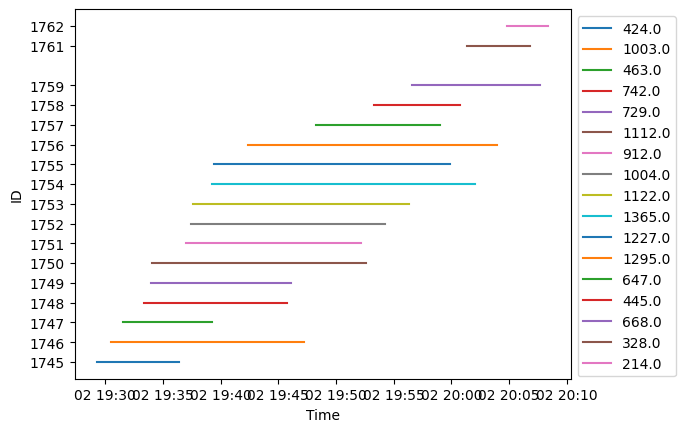

In [44]:
# Create a custom with custom ticks - this one is a little strange since we have the ID on the Axis and the Value in the legend
for index, row in data_prod.iterrows():
    plt.plot([row['ProductionStart'],row['ProductionEnd']],
             [index,index],
             label = row['ProductionDurationInSeconds'])

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Time')
plt.ylabel('ID')

custom_yticks = data_prod.index;  # Positions of the ticks
custom_ytick_labels = data_prod.index.values;  # Labels for the ticks

# Set the custom tick labels
plt.yticks(custom_yticks, custom_ytick_labels);

Can you find the prodcution order that took the longest?

In [45]:
data_prod[data_prod['ProductionDurationInSeconds'] == data_prod['ProductionDurationInSeconds'].max()]

,Type,ProductionStart,ProductionEnd,ProductionDurationInSeconds
ProcessId,,,,
1754,6,2022-09-02 19:39:17,2022-09-02 20:02:02,1365.0


,ProcessId,RoundId,Workstation,Start,End,ProcessDurationInSeconds
4155,1754,216,1,2022-09-02 19:40:43,2022-09-02 19:42:01,78.0
4166,1754,216,2,2022-09-02 19:45:23,2022-09-02 19:46:10,47.0
4180,1754,216,3,2022-09-02 19:50:44,2022-09-02 19:53:38,174.0
4205,1754,216,4,2022-09-02 20:00:43,2022-09-02 20:01:51,68.0
4207,1754,216,5,2022-09-02 20:01:53,2022-09-02 20:01:55,2.0


Text(0, 0.5, 'Workstation')

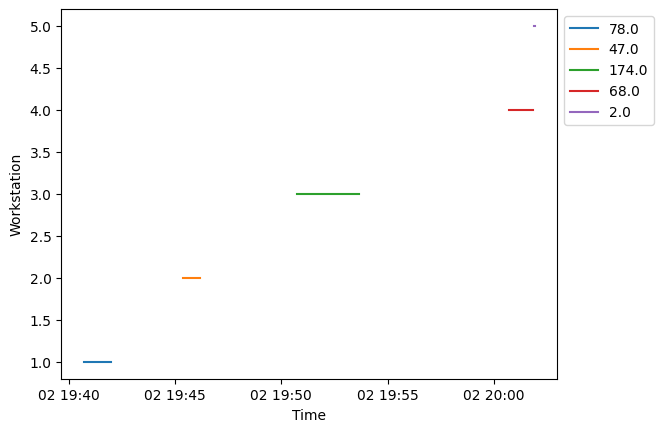

In [46]:
sample_df = data_proc[data_proc['ProcessId'] == 1754]
display(sample_df.head())

for index, row in sample_df.iterrows():
    plt.plot([row['Start'],row['End']],
             [row['Workstation'],row['Workstation']],
             label = row['ProcessDurationInSeconds'])

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Time')
plt.ylabel('Workstation')

We do this by merging the two data frames, based on the left (data_proc) table's Process ID.

In [47]:
result = pd.merge(data_proc, data_prod, how="left", on=['ProcessId'])
result['ProcessId'] = result['ProcessId'].astype("category")
result['Workstation'] = result['Workstation'].astype("category")
result['Type'] = result['Type'].astype("category")
result

,ProcessId,RoundId,Workstation,Start,End,ProcessDurationInSeconds,Type,ProductionStart,ProductionEnd,ProductionDurationInSeconds
0,1745,216,1,2022-09-02 19:29:26,2022-09-02 19:30:27,61.0,6.0,2022-09-02 19:29:19,2022-09-02 19:36:23,424.0
1,1745,216,2,2022-09-02 19:30:29,2022-09-02 19:32:32,123.0,6.0,2022-09-02 19:29:19,2022-09-02 19:36:23,424.0
2,1746,216,1,2022-09-02 19:30:36,2022-09-02 19:32:01,85.0,6.0,2022-09-02 19:30:33,2022-09-02 19:47:16,1003.0
3,1747,216,1,2022-09-02 19:32:23,2022-09-02 19:33:21,58.0,7.0,2022-09-02 19:31:35,2022-09-02 19:39:18,463.0
4,1745,216,3,2022-09-02 19:32:35,2022-09-02 19:34:29,114.0,6.0,2022-09-02 19:29:19,2022-09-02 19:36:23,424.0
...,...,...,...,...,...,...,...,...,...,...
92,1762,216,2,2022-09-02 20:05:56,2022-09-02 20:07:07,71.0,6.0,2022-09-02 20:04:48,2022-09-02 20:08:22,214.0
93,1759,216,5,2022-09-02 20:06:51,2022-09-02 20:07:20,29.0,7.0,2022-09-02 19:56:33,2022-09-02 20:07:41,668.0
94,1762,216,3,2022-09-02 20:07:09,2022-09-02 20:07:31,22.0,6.0,2022-09-02 20:04:48,2022-09-02 20:08:22,214.0
95,1762,216,4,2022-09-02 20:07:46,2022-09-02 20:08:12,26.0,6.0,2022-09-02 20:04:48,2022-09-02 20:08:22,214.0


Next step is to group the data based on the type of product and the workstation used. Can you make a statement regarding the different prouct types?

<Axes: xlabel='Type', ylabel='ProcessDurationInSeconds'>

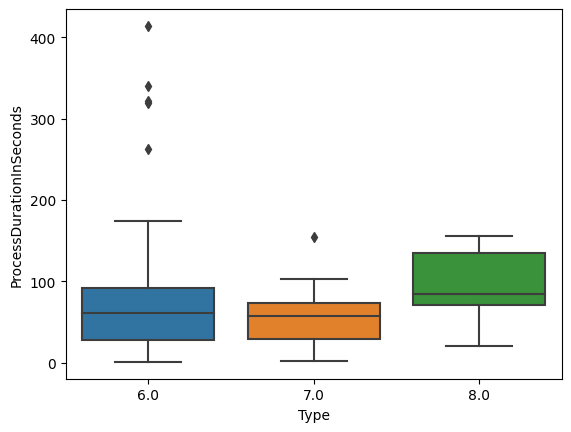

In [48]:
# Create a boxplot by categories
sns.boxplot(x='Type', y='ProcessDurationInSeconds', data=result)


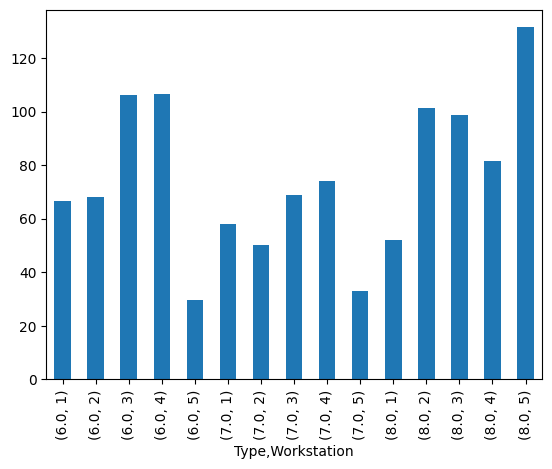

In [49]:
# Plot the mean value of the processing time based on work station
res_plot = result.groupby(['Type','Workstation'])['ProcessDurationInSeconds'].mean().plot.bar()

Based on the plot above it can be seen, that depending on the combination of type and workstation large deviation in regards to the processtime can be expected.

<Axes: xlabel='Type', ylabel='ProcessDurationInSeconds'>

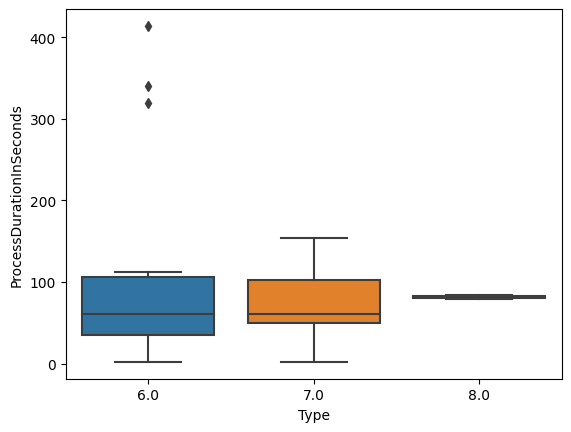

In [50]:
# Can we check what class the outliers in workstation 4 had?
# Group the data by 'Category'
sample_df = result[result['Workstation'] == 4]
grouped = sample_df.groupby('Type')

sns.boxplot(x='Type', y='ProcessDurationInSeconds', data=sample_df)

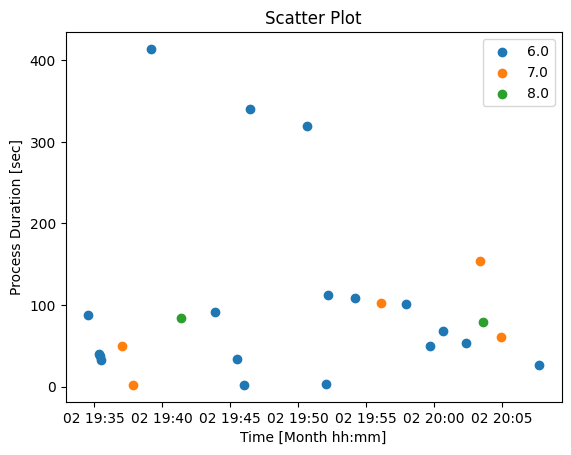

In [51]:
for name, group in grouped:
    plt.scatter(group['Start'], group['ProcessDurationInSeconds'], label=name)


# Customize the plot as needed (e.g., add labels, title, etc.)
plt.xlabel('Time [Month hh:mm]')
plt.ylabel('Process Duration [sec]')
plt.title('Scatter Plot')
plt.legend()

# Show the plot
plt.show()


There is one more aspect to check on - Variant 8 seems to take longer than the others.

<Axes: xlabel='Type', ylabel='ProcessDurationInSeconds'>

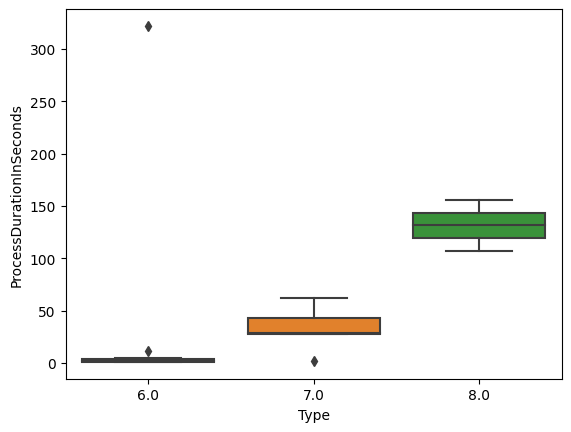

In [52]:
# Station 5 seems to struggle with Variant 8?
# Group the data by 'Category'
sample_df = result[result['Workstation'] == 5]
# Create a boxplot by categories
sns.boxplot(x='Type', y='ProcessDurationInSeconds', data=sample_df)

In [53]:
result.to_csv('output.csv')

## Taking a look at the Customer Data as well

Please be aware that we will not be able to match a production order to a customer order - since the production is customer independent!

In [ ]:
col = ['RoundId','Type','CustomerOrderEntered','PlannedDeliveryDate','TrueDeliveryDate','??']
customer_df = pd.read_csv('/content/kundenauftrag.csv', header=None, names=col, index_col=0 , sep=',',on_bad_lines='skip')

customer_df['CustomerOrderEntered'] = pd.to_datetime(customer_df['CustomerOrderEntered'])
customer_df['TrueDeliveryDate'] = pd.to_datetime(customer_df['TrueDeliveryDate'])
customer_df['PlannedDeliveryDate'] = pd.to_datetime(customer_df['PlannedDeliveryDate'])

In [ ]:
customer_df = customer_df[customer_df['RoundId'] == 216]
customer_df = customer_df.dropna()

In [ ]:
#Generate the duration based on the delivered and the start date
customer_df['Duration'] = customer_df['TrueDeliveryDate'] - customer_df['CustomerOrderEntered']
customer_df['DurationInSeconds'] = customer_df['Duration'].dt.total_seconds()
customer_df = customer_df.drop(columns=['Duration'])

# Generate the delay of the order in secondes
customer_df['Delay'] = customer_df['TrueDeliveryDate'] - customer_df['PlannedDeliveryDate']
customer_df['DelayInSeconds'] = customer_df['Delay'].dt.total_seconds()
customer_df = customer_df.drop(columns=['Delay'])

In [ ]:
customer_df.head()

In [ ]:
# Group the data by 'Category'
grouped = customer_df.groupby('Type')

for name, group in grouped:
    plt.scatter(group['CustomerOrderEntered'], group['DurationInSeconds'], label=name)


# Customize the plot as needed (e.g., add labels, title, etc.)
plt.plot([customer_df['TrueDeliveryDate'].min(),customer_df['TrueDeliveryDate'].max()],
         [180,180],'r-', label = 'Due Date')

plt.xlabel('Time [Month hh:mm]')
plt.ylabel('Time until delivery [sec]')
plt.title('Scatter Plot')
plt.legend()

# Show the plot
plt.show()

In [ ]:
customer_df[customer_df['DelayInSeconds'] > 0]


## End of Lab 1
We now have gained an understanding and prepared our data.

The outliers at station 4 were true outliers and seem to be related to some issue in the assembly line. It seems that this does not occure too often.

Considering the median, assembling the products at workstation 3 takes longer than at other stations. The workload of workstation 5 seems to be highly skewed.

We found that the median processing time for Variant 8 is higher, compared to the others and that that is often delivered late!

We can suspect a rise in time until delivery into the late game?

Let revisit the assembly station and line balancing in the lab.